In [129]:
from Simulation import Simulation
from matplotlib import pyplot as plt
import math
import statistics


simulacao1 = Simulation("Traces/osmWithStop.xml")

carro1 = simulacao1.getVehicleById("f_0.0")

simulacao2 = Simulation("output_simulation.xml")

carro2 = simulacao2.getVehicleById("f_0.0")

carro1x = []
carro1y = []
carro2x = []
carro2y = []


for i in range(1001):
    answer1 = carro1.get_timestep_dict(i)
    answer2 = carro2.get_timestep_dict(i)
    if answer1 != None:
        print(f"Carro1: {i}")
        print(answer1)
    if answer2 != None:
        print(f"Carro2: {i}")
        print(answer2)
    if answer1 != None and answer2 != None:
        carro1x.append(answer1["x"])
        carro1y.append(answer1["y"])
        carro2x.append(answer2["x"])
        carro2y.append(answer2["y"])
        
print(len(carro1x))
print(len(carro1y))
print(len(carro2x))
print(len(carro2y))

Carro1: 20
{'id': 'f_0.0', 'x': -38.569393, 'y': -3.738326, 'angle': 193.89, 'speed': 0.0, 'pos': 12.1, 'lane': '836187039#0_0', 'slope': 0.0}
Carro2: 20
{'id': 'f_0.0', 'x': 1705.87, 'y': 2237.88, 'angle': 193.89, 'speed': 0.0, 'pos': 12.1, 'lane': '836187039#0_0', 'slope': 0.0}
Carro1: 21
{'id': 'f_0.0', 'x': -38.569398, 'y': -3.738334, 'angle': 196.99, 'speed': 1.02, 'pos': 13.12, 'lane': '836187039#0_0', 'slope': 0.0}
Carro2: 21
{'id': 'f_0.0', 'x': 1705.34, 'y': 2237.0, 'angle': 196.99, 'speed': 1.02, 'pos': 13.12, 'lane': '836187039#0_0', 'slope': 0.0}
Carro1: 22
{'id': 'f_0.0', 'x': -38.569407, 'y': -3.738349, 'angle': 202.86, 'speed': 1.95, 'pos': 15.06, 'lane': '836187039#0_0', 'slope': 0.0}
Carro2: 22
{'id': 'f_0.0', 'x': 1704.34, 'y': 2235.34, 'angle': 202.86, 'speed': 1.95, 'pos': 15.06, 'lane': '836187039#0_0', 'slope': 0.0}
Carro1: 23
{'id': 'f_0.0', 'x': -38.569421, 'y': -3.738374, 'angle': 210.95, 'speed': 3.14, 'pos': 18.2, 'lane': '836187039#0_0', 'slope': 0.0}
Carro2

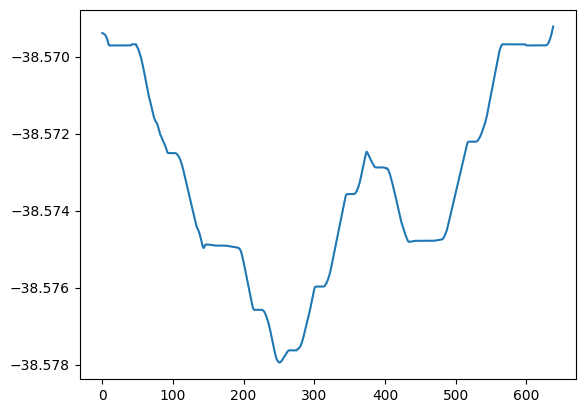

In [130]:
plt.plot(carro1x)

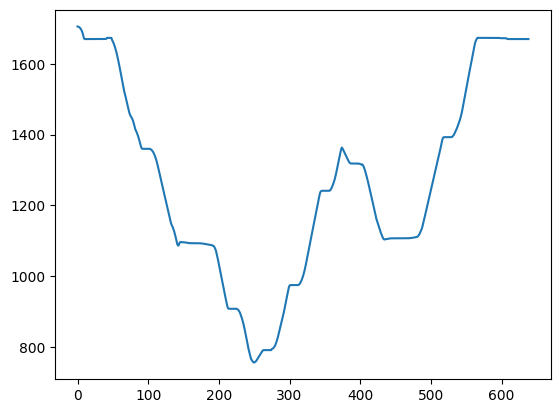

In [131]:
plt.plot(carro2x)

In [132]:
def normalize_and_scale(value, original_min, original_max, target_min, target_max):
    if original_max == original_min:
        raise ValueError("O valor máximo não pode ser igual ao valor mínimo no sistema original para normalização.")
    if target_max == target_min:
        raise ValueError("O valor máximo não pode ser igual ao valor mínimo no sistema alvo para escalonamento.")

    # Normalização para o intervalo 0-1
    normalized = (value - original_min) / (original_max - original_min)
    
    # Escalonamento para o novo intervalo
    scaled = normalized * (target_max - target_min) + target_min
    
    return scaled

def getMaxAndMin(vectorcoordinates):
    maxX = -1*math.inf
    maxY = -1*math.inf
    minX = math.inf
    minY = math.inf
    for listType in vectorcoordinates:
        for listType2 in listType:
            for coord in listType2:
                if(coord[0] == 0 and coord[1] == 0):
                    continue
                if(coord[0] > maxX):
                    maxX = coord[0]

                if(coord[1] > maxY):
                    maxY = coord[1]

                if(coord[0] < minX):
                    minX = coord[0]

                if(coord[1] < minY):
                    minY = coord[1]

    return [[minX,minY],[maxX,maxY]]


def modulo(x):
    if x<0:
        return x*-1
    return x

In [133]:
vector1 = simulacao1.vector_with_all_coordinates()
max1 = getMaxAndMin(vector1)
print(max1) 

[[-38.577948, -3.74796], [-38.569181, -3.73822]]


In [134]:
vector2 = simulacao2.vector_with_all_coordinates()
print(vector2)
max2 = getMaxAndMin(vector2)
print(max2)

[[], [[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1705.87, 2237.88), (1705.34, 2237.0), (1704.34, 2235.34), (1702.73, 2232.64), (1700.6, 2229.09), (1697.64, 2225.03), (1693.54, 2220.52), (1688.42, 2216.16), (1681.24, 2213.65), (1672.86, 2212.3), (1670.25, 2209.61), (1670.3, 2199.87), (1670.33, 2193.46), (1670.34, 2191.05), (1670.34, 2190.87), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.34, 2190.84), (1670.35, 2189.8), (1670.36, 2188.07), (1670.38, 2185.2), (1670.42, 2181.62), (1670.47, 2177.25), (1670.52, 2172.47), (1671.63, 2169.24),

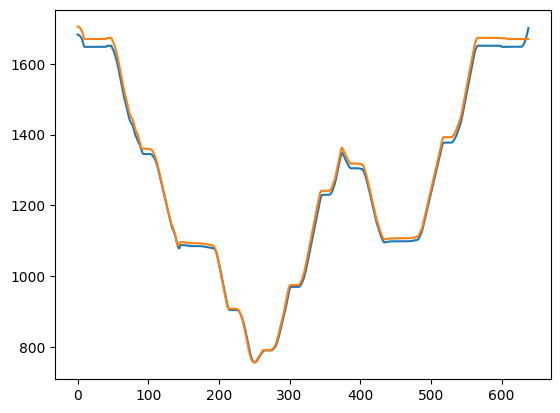

In [136]:
normalized1 = list(map(lambda x: normalize_and_scale(x,max1[0][0],max1[1][0],max2[0][0],max2[1][0]),carro1x))

plt.plot(normalized1,label='Normalizado')
plt.plot(carro2x,label='Original')

plt.legend()